# Northwestern County: Real Estate Market Analysis  

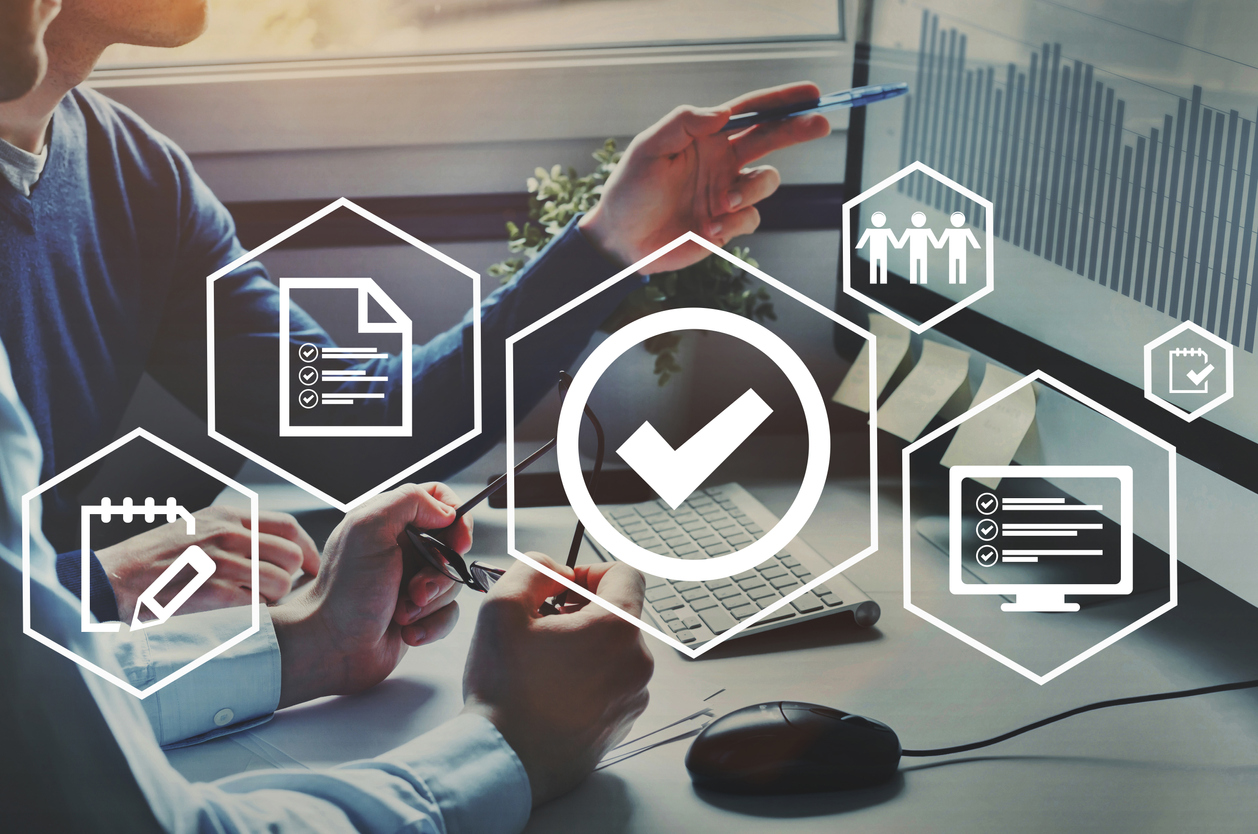

### Project Overview:   
Every Door Real Estate, our stakeholder, is facing a business
issue related to their clients' home-buying process. To better prepare their clients for
this process, the company wants to offer a pre-approval house loan service through
a lender. However, the challenge is to determine a model that can effectively
demonstrate how property attributes impact sales price. This model will help Every
Door's agents to provide their clients with a clearer insight into how much pre-approval they need for their ideal property.

### Audience:
Every Door Real Estate. The agency's mission is to provide homeowners with comprehensive insights to enhance their decision-making process for maxizing the resale value of their properties.


### Goal:  
This analysis will be guiding Every Door Real Estate on the impact of various property attributes on
their pricing structure. The anlysis aims to offer a clear understanding of how property attributes collectively influence the estimated value of homes, enabling strategic decisions for optimal return on investment.This is particularly pertinent as it has been suggested that the post-sale value of properties tends to increase over time

## Data Understanding
This analysis uses King County House Sales dataset, found in kc_house_data.csv in the data folder in GitHub repository. The dataset is significant in predicting housesales in relation to property attributes.  
The data is imported and uploaded using necessary libraries. Some of the libraries imported for data analysis includes matplotlib, numpy,pandas, seaborn, scipy,itertools, and math. The structure of the data is made up of 21597 observations and 21 columns describing the property attributes.

## Column Names and Descriptions for King County Data Set
1. **Id** - Unique identifier for a house  
2. **Date** - Date house was sold  
3.**Price** - Sale price (prediction target)  
4.**Bedrooms** - Number of bedrooms  
5.**Bathrooms** - Number of bathrooms  
6.**Sqft_living** - Square footage of living space in the home  
7. **Sqft_lot** - Square footage of the lot  
8. **Floors** - Number of floors (levels) in house  
9. **Waterfront** - Whether the house is on a waterfront  
Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
10. **View** - Quality of view from house  
Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
11. **Condition** - How good the overall condition of the house is. Related to maintenance of house.  
See the King County Assessor Website for further explanation of each condition code
12. **Grade** - Overall grade of the house. Related to the construction and design of the house.  
See the King County Assessor Website for further explanation of each building grade code
13. **Sqft_above** - Square footage of house apart from basement  
14. **Sqft_basement** - Square footage of the basement  
15. **Yr_built** - Year when house was built  
16. **Yr_renovated** - Year when house was renovated  
17. **Zipcode** - ZIP Code used by the United States Postal Service  
18. **Lat** - Latitude coordinate  
19. **Long** - Longitude coordinate  
20. **Sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors  
21. **Sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

The data suggest that prices of houses depends on the features of the property.
However data cleaning and wrangling is important to make the data more useful. The process of data cleaning and wrangling includes checking for missing values, duplicates, uniformity,and data formats.Additional cleaning including replacing missing values, dropping insignificant data, filling null values, and dropping duplicates using relevant functions and methods is also done to further make the data more valuable.


# Data Loading and Importation of Modules

In [1]:
import matplotlib.pyplot as plt   
import numpy as np  
import pandas as pd  
import scipy.stats as stats  
import seaborn as sns   
import statsmodels.api as sm  


import warnings  
warnings.filterwarnings('ignore')

In [2]:
pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Users\HomePC\anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:

import scipy.stats as stats  
import statsmodels.api as sm 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

import warnings  
warnings.filterwarnings('ignore')
df=pd.read_csv("kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


# Data Cleaning and Wrangling

The process of data cleaning and wrangling entailed formatting the data to remove duplicates, filled missing values, deleting undesirable symbols, and selecting required property variables for further modelling. From the observations, the data did not have any duplicates.  
However, the variables:  
a.	Waterfront, ye_renovated, and view contained missing values which were filled with appropriate data. The missing values in waterfront were replaced with “NO” to assume the households lacked waterfronts. The missing values in view were replaced with “NONE” to assumed a lacked of view. The missing values in yr_renovated were replaced with 0 to mean the houses were never renovated.   
b.	The values in the variable bathroom were standardized to decimal places because it was observed the values lacked uniformity of decimal places.   
c.	The date section was standardized to: day, month, and year format for uniformity.    
d.	The sqft_basement contained undesirable symbols which were removed, replaced with mean, and the data converted to numerical values. The data was also converted to 2 decimal places for uniformity  
e.	The values in the latitude and longitude variables were converted to 2 decimal places for effective analysis and modelling  
f.	The whole data set was confirmed clean and ready for modelling using the info() method  
g.	During wrangling, the columns 'zipcode', 'lat', 'long', 'yr_renovated', 'yr_built' were observed to be insignificant and consequently were dropped   


In [4]:
df.shape

(21597, 21)

In [5]:
#check for duplicates and keep them close to each other
df.duplicated().sum()

0

In [6]:
#confirm duplicates
df[df.duplicated(keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [7]:
#confirm duplicates
df.drop_duplicates(keep="first", inplace=True)

In [8]:
#Check for nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
#check data type in waterfront;has nulls
df["waterfront"].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [10]:
#replace nan with No. Assumption is nan means no waterfront
#Check for successful replacements
df['waterfront'].replace(np.nan, "NO", inplace=True, regex=False)

In [11]:
df["waterfront"].unique()

array(['NO', 'YES'], dtype=object)

In [12]:
#check data type and unique values in conditions
df["condition"].unique().tolist()

['Average', 'Very Good', 'Good', 'Poor', 'Fair']

In [13]:
#check data type and unique values in conditions
df["condition"].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

In [14]:
#check data type and unique values in bathrooms
df["bathrooms"].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [15]:
df["bathrooms"]=df["bathrooms"].round(2)
df["bathrooms"]

0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21592    2.50
21593    2.50
21594    0.75
21595    2.50
21596    0.75
Name: bathrooms, Length: 21597, dtype: float64

In [16]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [17]:
#Let's assume that missing values in 'yr_renovated' mean no renovations were done, so we'll fill the missing values with 0.
# Fill missing values in 'yr_renovated' with 0
df['yr_renovated'].fillna(0, inplace=True)

# Verify the changes
print(df['yr_renovated'].value_counts())

yr_renovated
0.0       20853
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64


In [18]:
#check data type and unique values in view
df["view"].unique().tolist()

['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR']

In [19]:
#check data type and unique values in conditions
view_counts = df['view'].value_counts()
view_counts

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [20]:
# Replacing the NaN values with NONE
# Verifying the Changes
df['view'].replace(np.nan, "NONE", inplace=True, regex=False)
df['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [21]:
# changing my date column for easier readability
df['date'] = pd.to_datetime(df['date'],format='%m/%d/%Y')

In [22]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [23]:
data = df[['bedrooms', 'sqft_living', 'sqft_lot']]
data

,bedrooms,sqft_living,sqft_lot
0,3,1180,5650
1,3,2570,7242
2,2,770,10000
3,4,1960,5000
4,3,1680,8080
...,...,...,...
21592,3,1530,1131
21593,4,2310,5813
21594,2,1020,1350
21595,3,1600,2388


In [24]:
# replace '?' with NaN
df['sqft_basement'].replace('?', np.nan, inplace=True)

# convert the column to a numeric data type
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

# fill missing values with the mean value of the column
df['sqft_basement'].fillna(np.mean(df['sqft_basement']), inplace=True)


In [25]:
# Checking whether the 'sqft_living15' and 'sqft_lot15' have any missing values
df[['sqft_living15', 'sqft_lot15','sqft_above']].isnull().sum()

sqft_living15    0
sqft_lot15       0
sqft_above       0
dtype: int64

In [26]:
#check data type and unique values in 'sqft_basement'
df['sqft_basement'].unique()

array([   0.        ,  400.        ,  910.        , 1530.        ,
        291.85172397,  730.        , 1700.        ,  300.        ,
        970.        ,  760.        ,  720.        ,  700.        ,
        820.        ,  780.        ,  790.        ,  330.        ,
       1620.        ,  360.        ,  588.        , 1510.        ,
        410.        ,  990.        ,  600.        ,  560.        ,
        550.        , 1000.        , 1600.        ,  500.        ,
       1040.        ,  880.        , 1010.        ,  240.        ,
        265.        ,  290.        ,  800.        ,  540.        ,
        710.        ,  840.        ,  380.        ,  770.        ,
        480.        ,  570.        , 1490.        ,  620.        ,
       1250.        , 1270.        ,  120.        ,  650.        ,
        180.        , 1130.        ,  450.        , 1640.        ,
       1460.        , 1020.        , 1030.        ,  750.        ,
        640.        , 1070.        ,  490.        , 1310.     

In [27]:
df['sqft_basement']=df['sqft_basement'].replace({',': ''}, regex=True)
df['sqft_basement']


0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [28]:
df["sqft_basement"]=df["sqft_basement"].round(2)
df["sqft_basement"]

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: float64

In [29]:
df['sqft_basement'].mean()

291.85168773440756

In [30]:
duplicates = df[df.duplicated(subset='id', keep=False)]
len(duplicates)
duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,NO,NONE,...,8 Good,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1380000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,...,11 Excellent,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,NO,NONE,...,6 Low Average,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,NO,NONE,...,8 Good,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,NO,NONE,...,7 Average,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,NO,NONE,...,9 Better,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


In [31]:
df['lat'].unique()

array([47.5112, 47.721 , 47.7379, ..., 47.3906, 47.3339, 47.6502])

In [32]:
df["lat"]=df["lat"].round(2)
df["lat"]

0        47.51
1        47.72
2        47.74
3        47.52
4        47.62
         ...  
21592    47.70
21593    47.51
21594    47.59
21595    47.53
21596    47.59
Name: lat, Length: 21597, dtype: float64

In [33]:
df['long'].unique()

array([-122.257, -122.319, -122.233, -122.393, -122.045, -122.005,
       -122.327, -122.315, -122.337, -122.031, -122.145, -122.292,
       -122.229, -122.394, -122.375, -121.962, -122.343, -122.21 ,
       -122.306, -122.341, -122.169, -122.166, -122.172, -122.218,
       -122.36 , -122.314, -122.304, -122.11 , -122.07 , -122.357,
       -122.368, -122.157, -122.31 , -122.132, -122.362, -122.282,
       -122.18 , -122.027, -122.347, -122.016, -122.364, -122.175,
       -121.977, -122.371, -122.151, -122.301, -122.451, -122.322,
       -122.189, -122.384, -122.369, -122.281, -122.29 , -122.114,
       -122.122, -122.116, -122.149, -122.339, -122.335, -122.344,
       -122.32 , -122.297, -122.192, -122.215, -122.16 , -122.179,
       -122.287, -122.036, -122.073, -121.987, -122.125, -122.34 ,
       -122.025, -122.008, -122.291, -122.365, -122.199, -122.194,
       -122.387, -122.372, -122.391, -122.351, -122.386, -122.249,
       -122.277, -122.378, -121.958, -121.714, -122.08 , -122.

In [34]:
df["long"]=df["long"].round(2)
df["long"]

0       -122.26
1       -122.32
2       -122.23
3       -122.39
4       -122.04
          ...  
21592   -122.35
21593   -122.36
21594   -122.30
21595   -122.07
21596   -122.30
Name: long, Length: 21597, dtype: float64

In [35]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [36]:
df.drop(['zipcode', 'lat', 'long', 'yr_renovated', 'yr_built'],
        axis=1, inplace=True)

In [37]:
df.head(4)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1360,5000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  sqft_living15  21597 non-null  int64         
 15  sqft_lot15     2159

# Data Exploration 


In the further exploring the data, the required columns were converted from object to integer data type. This was the case with sqft_basement. An additional total_space column was created to include sqft_living and sqft_lot variables. A further analysis was conducted using the.describe()method. The data was then check for correlation visually and statistically to determined relevant columns for use in modelling. When checking for correlation, variables than were greater than .5 were considered more correlated to price (with a correlation of 1.0). These variables were retained for machine learning and modelling through a multiple regression analysis. Additionally, the selected variables were checked for skewness. All the variables were skewed and the data was standardized to normal distribution. The outliers were checked and removed to make the regression model for effective. Lastly, variables with categorical data were converted to dummy variables and the data added to the dataframe

In [39]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [40]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement           float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [41]:
df['sqft_basement']=pd.to_numeric(df['sqft_basement'].replace('?', '0')).astype(int)
df['sqft_basement']

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int32

In [42]:
df['total_space'] = df['sqft_living'] + df['sqft_lot']
df['total_space'] 

0         6830
1         9812
2        10770
3         6960
4         9760
         ...  
21592     2661
21593     8123
21594     2370
21595     3988
21596     2096
Name: total_space, Length: 21597, dtype: int64

In [43]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,total_space
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0,1340,5650,6830
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400,1690,7639,9812
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0,2720,8062,10770
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910,1360,5000,6960
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0,1800,7503,9760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0,1530,1509,2661
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0,1830,7200,8123
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0,1020,2007,2370
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,8 Good,1600,0,1410,1287,3988


In [44]:
#Data Analysis 
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,total_space
count,2.159700e+04,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,2014-10-29 04:20:38.171968512,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,291.833820,1986.620318,12758.283512,1.717973e+04
min,1.000102e+06,2014-05-02 00:00:00,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,399.000000,651.000000,1.423000e+03
25%,2.123049e+09,2014-07-22 00:00:00,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1490.000000,5100.000000,7.036000e+03
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1840.000000,7620.000000,9.575000e+03
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,550.000000,2360.000000,10083.000000,1.299500e+04
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,6210.000000,871200.000000,1.652659e+06
std,2.876736e+09,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,437.822457,685.230472,27274.441950,4.158172e+04


In [45]:
df.corr()

ValueError: could not convert string to float: 'NO'

In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_columns].corr()
correlation_with_price = correlation_matrix['price'].abs().sort_values(ascending=False)
print(correlation_with_price)

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu");

In [ ]:
#drop less correlated variables 
df.drop(['id', 'date',  'bedrooms','sqft_lot', 'floors', 'sqft_basement', 'sqft_lot15', 'total_space'],
        axis=1, inplace=True)

In [ ]:
df

In [ ]:
from sklearn.model_selection import train_test_split
#check for basic correlations in the data
df.hist(figsize=(30,20), color='grey', edgecolor='white');

### Deep Processing
Checking and Removing Skewness

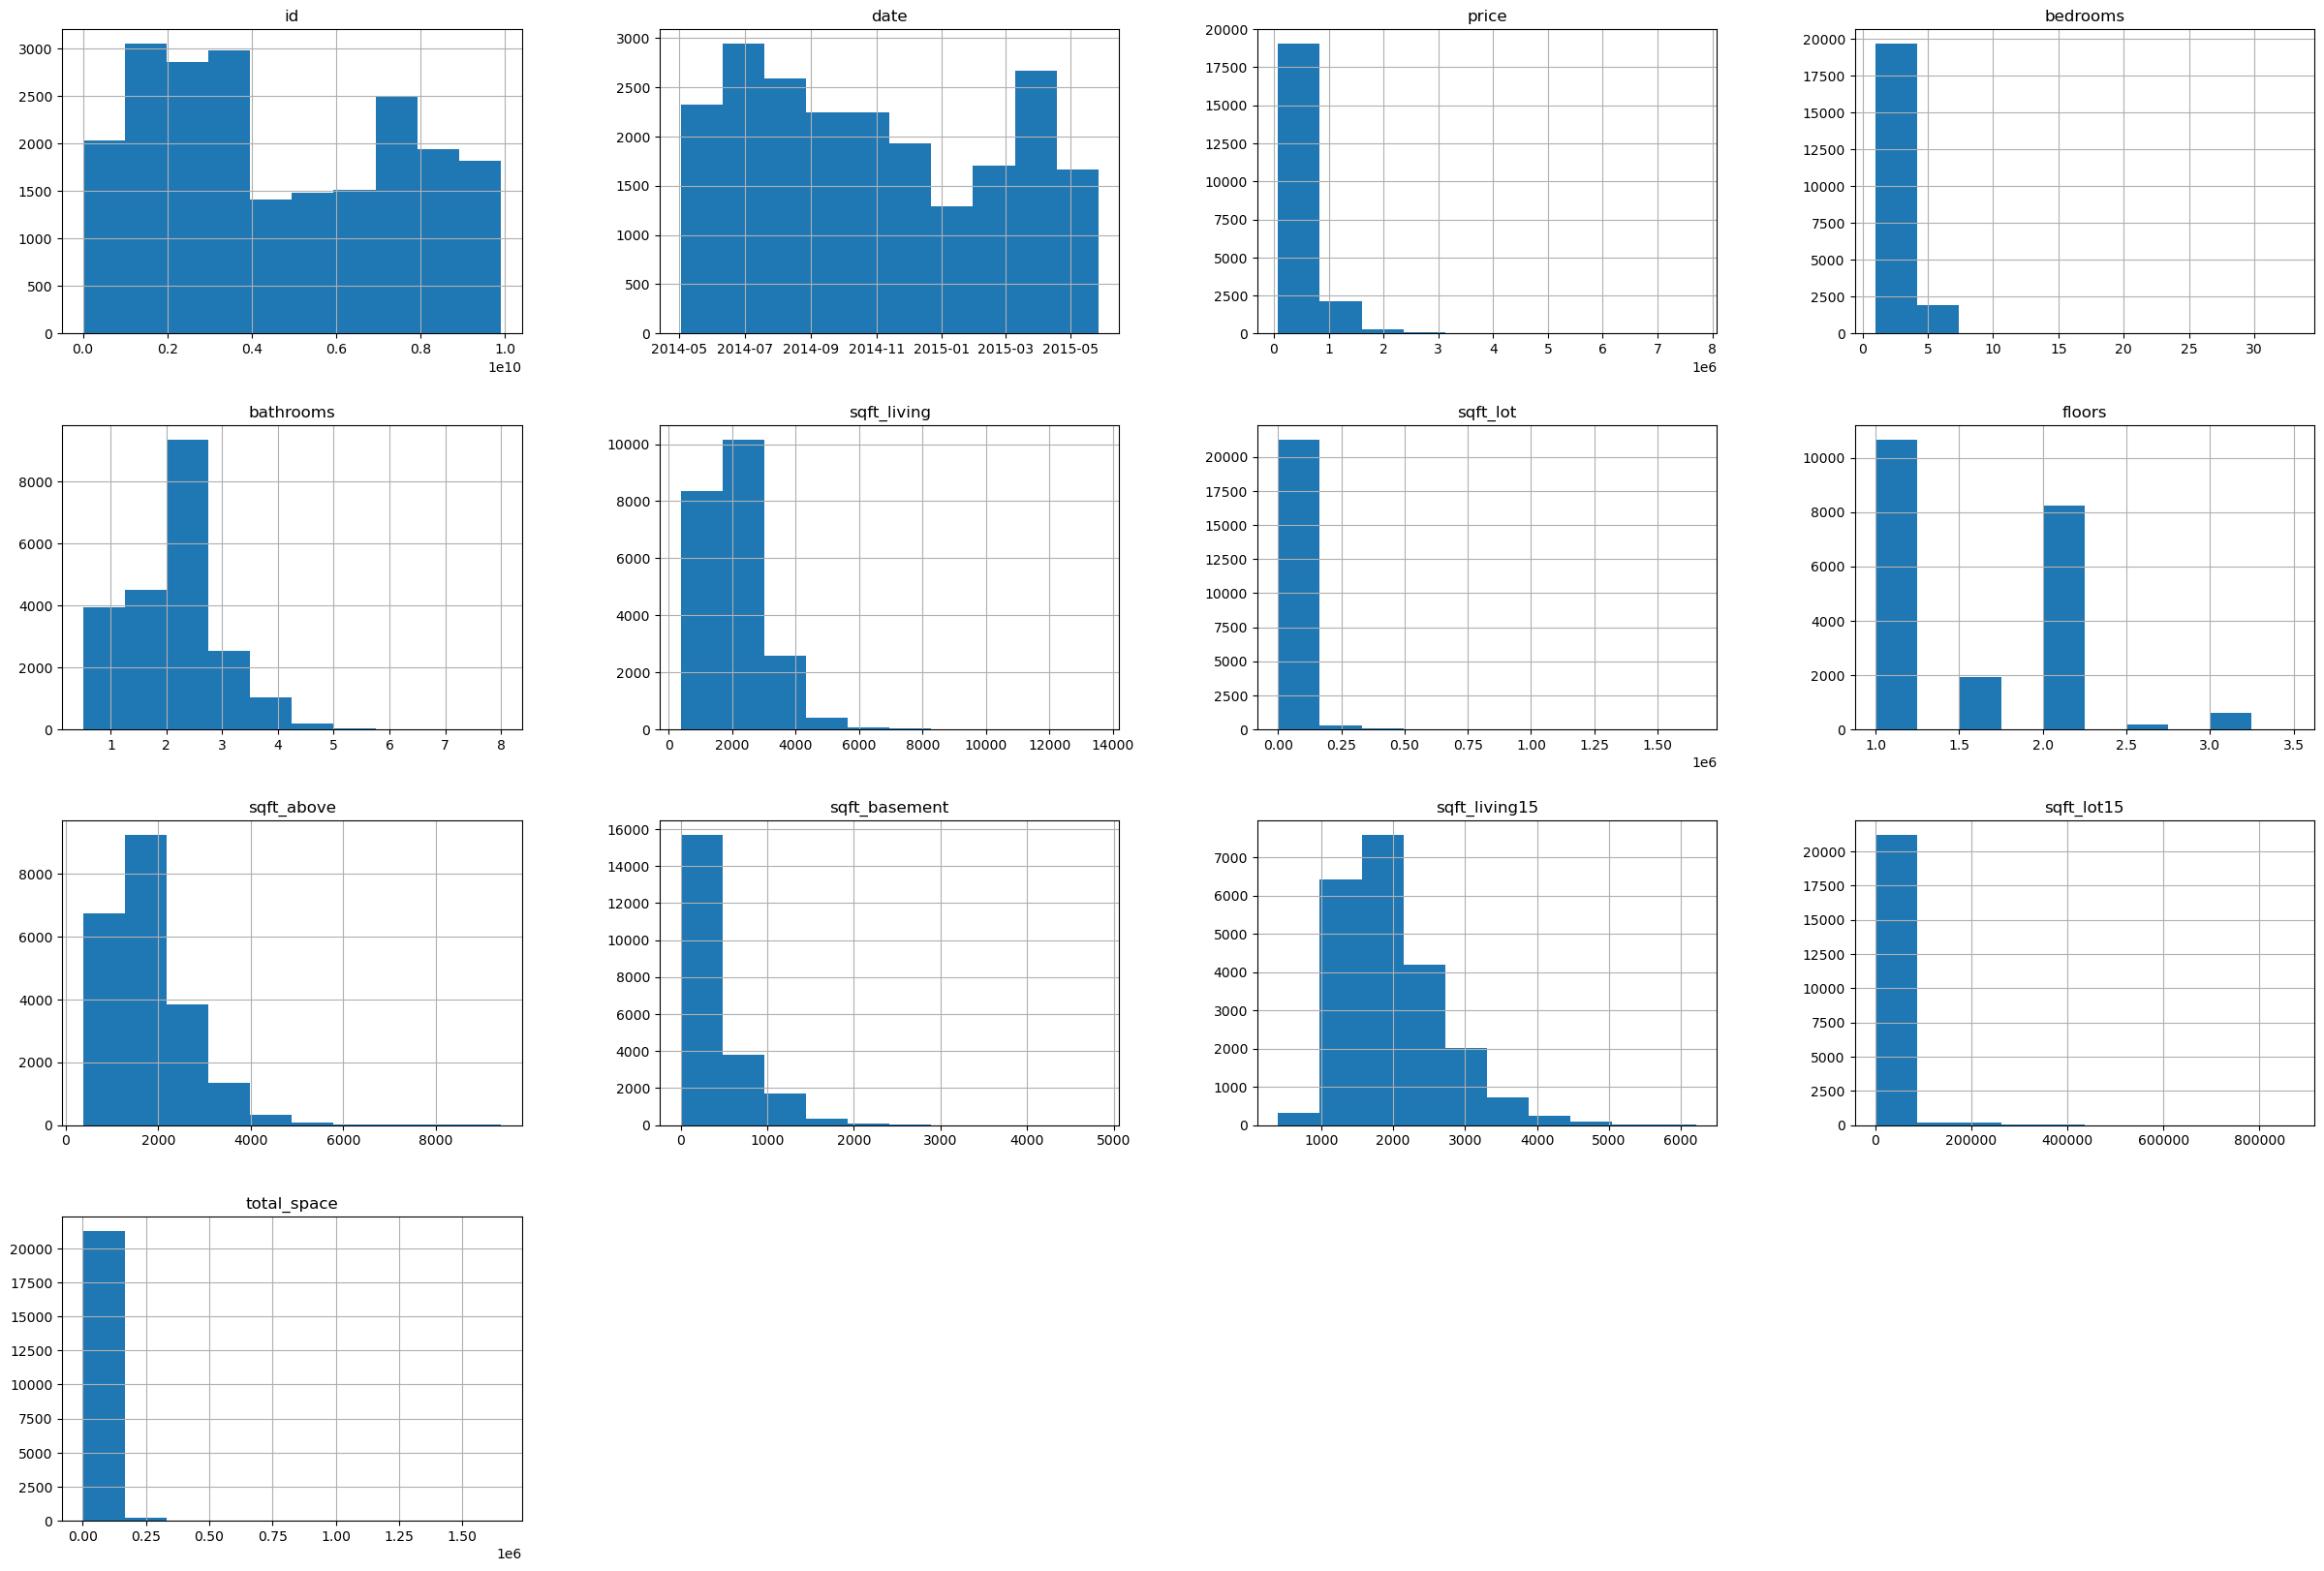

In [46]:
df.hist(figsize=(30,20));

In [47]:
#standardized data to normal distribution
df['price']=np.log(df['price']+1)
df['bathrooms']=np.log(df['bathrooms']+1)
df['sqft_living']=np.log(df['sqft_living']+1)
df['sqft_above']=np.log(df['sqft_above']+1)
df['sqft_living15']=np.log(df['sqft_living15']+1)


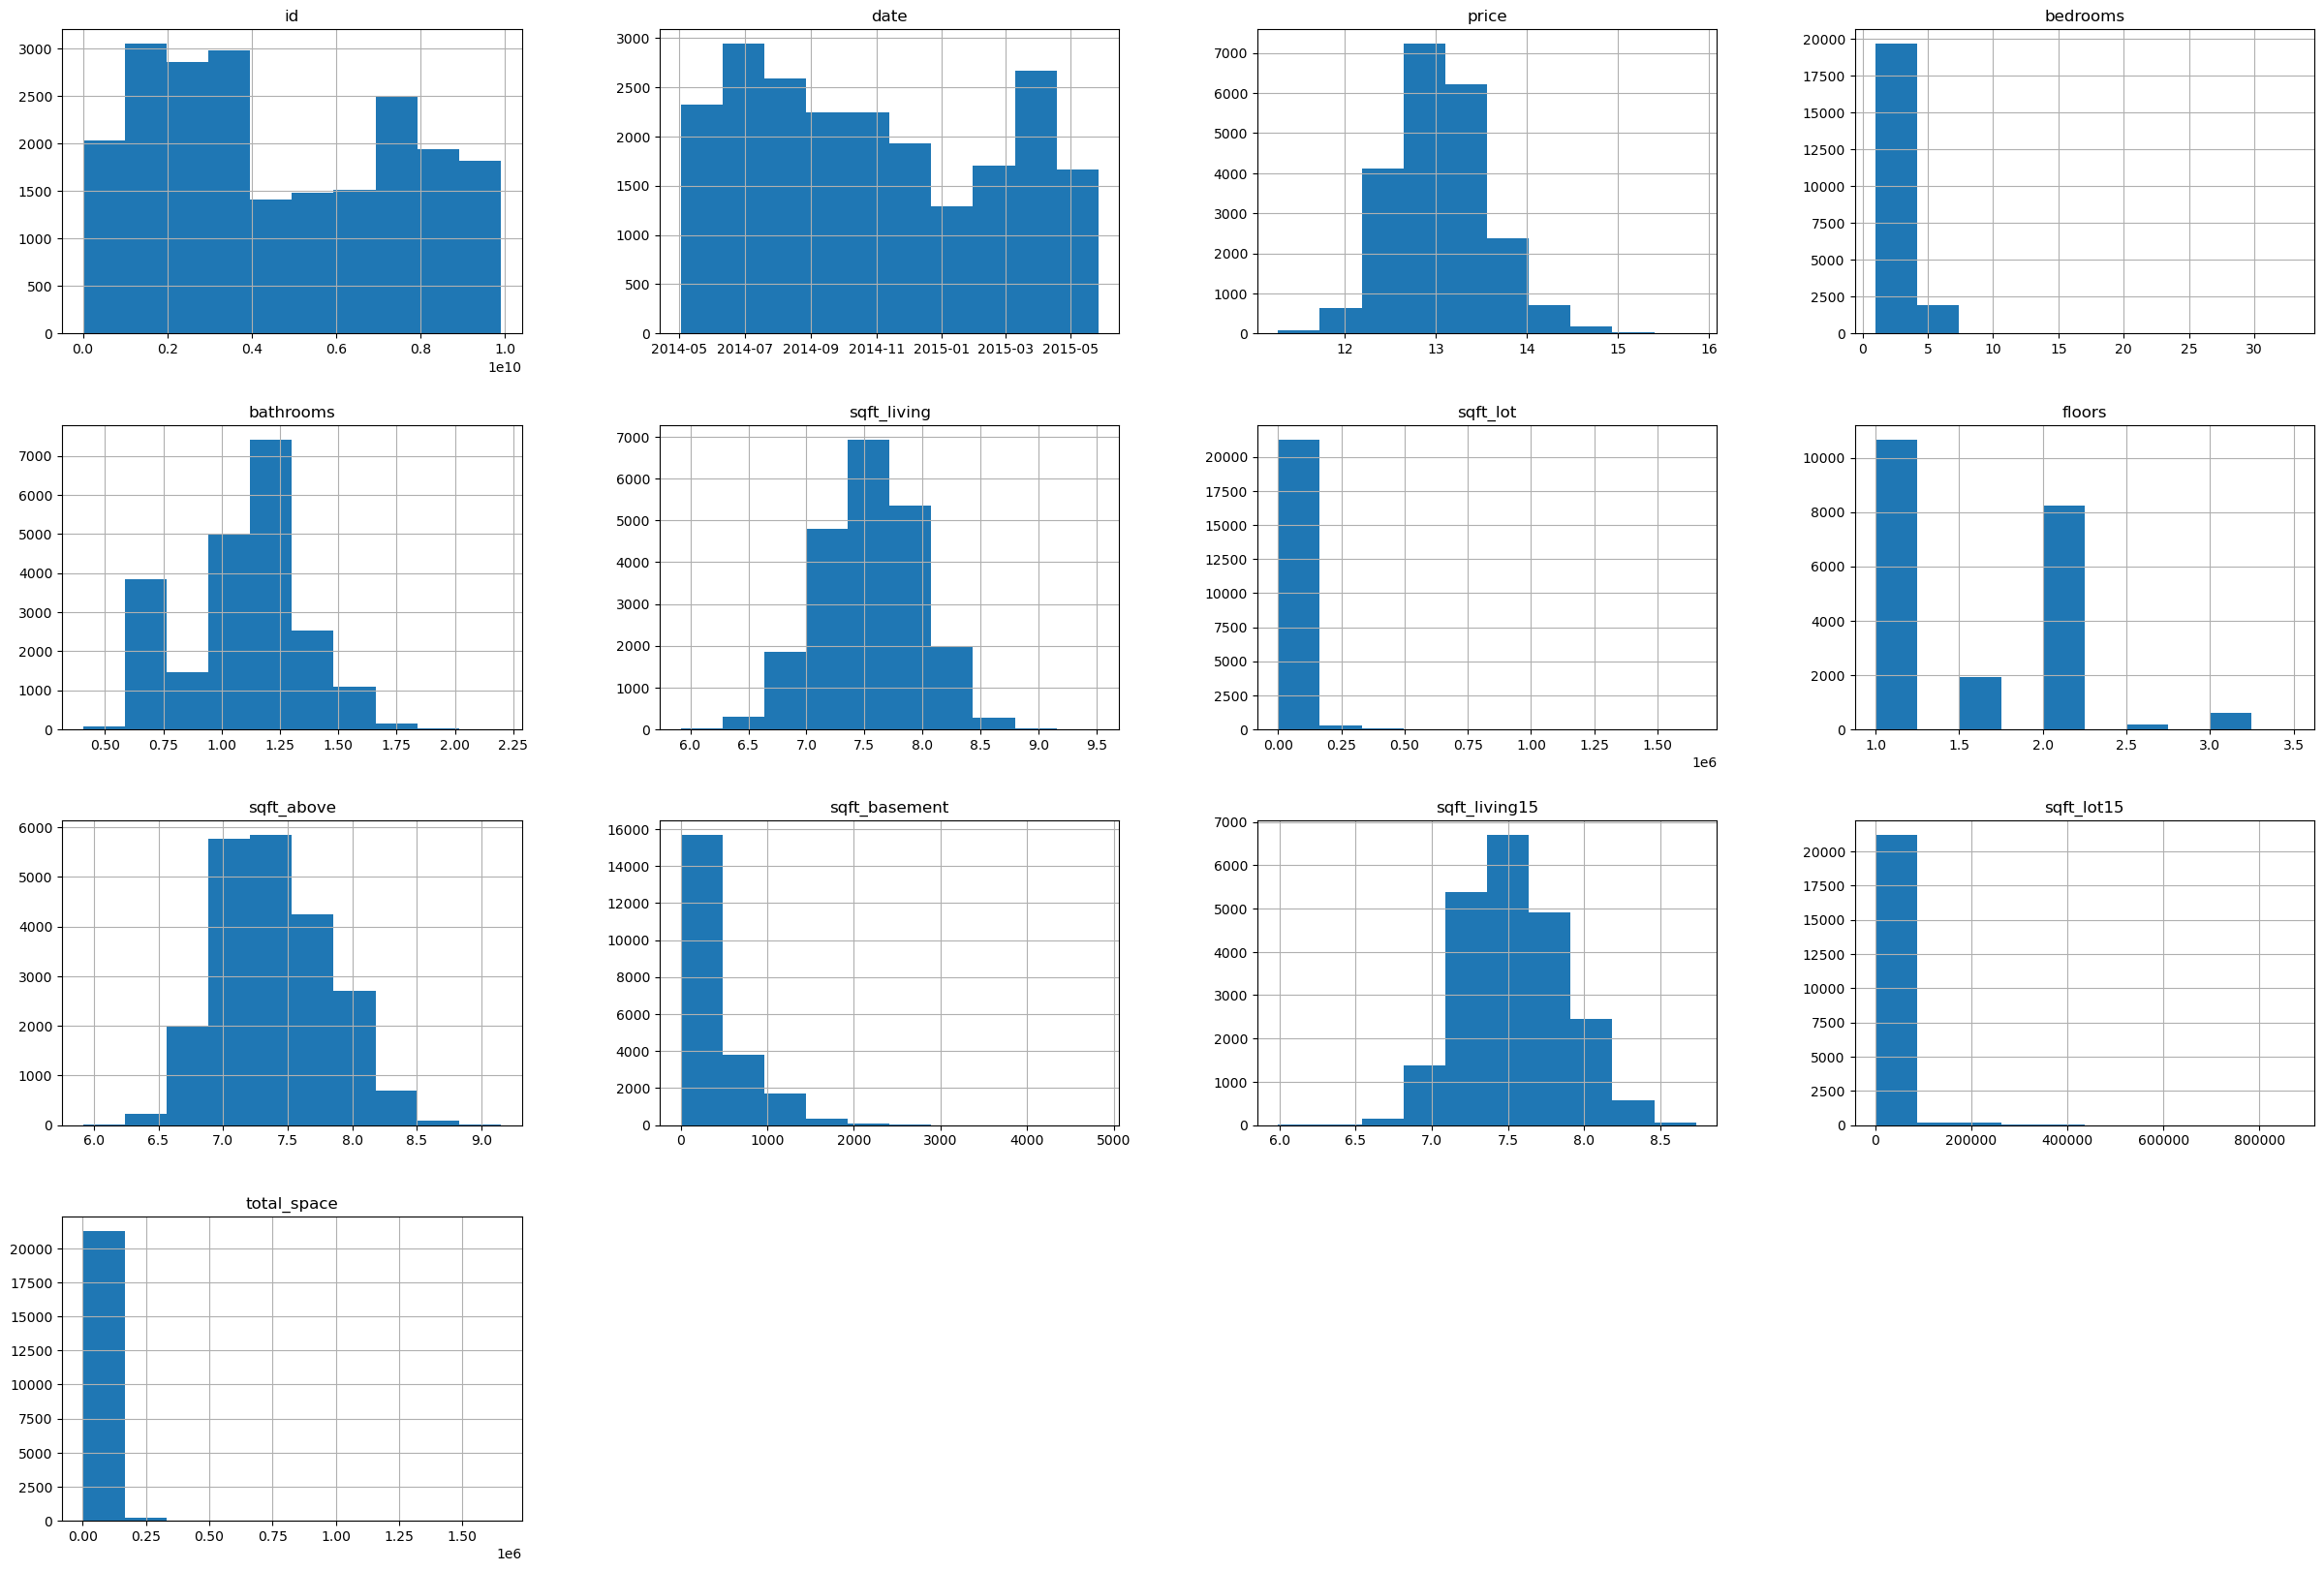

In [48]:
df.hist(figsize=(30,20));

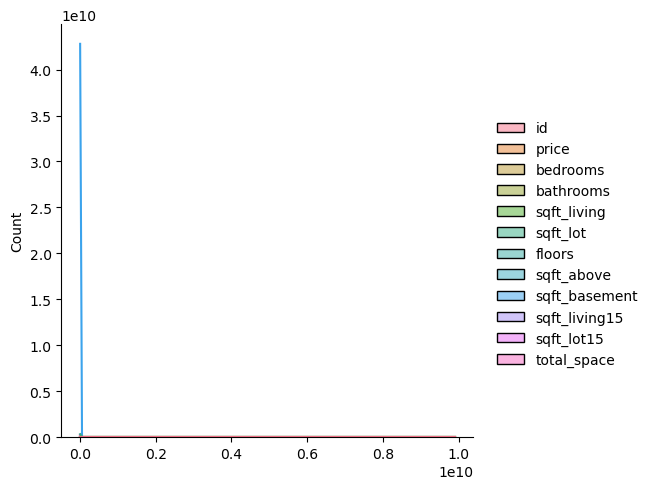

In [49]:
sns.displot(df,bins=20,kde=True);

In [50]:
#Check for outliers in the bathroom column
import numpy as np
count = 0
bathroom_outliers = []
mean = np.mean(df['bathrooms'])
max_distance = np.std(df['bathrooms']) * 3 

for idx, row in df['bathrooms'].T.items():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx, inplace=True)
count

30

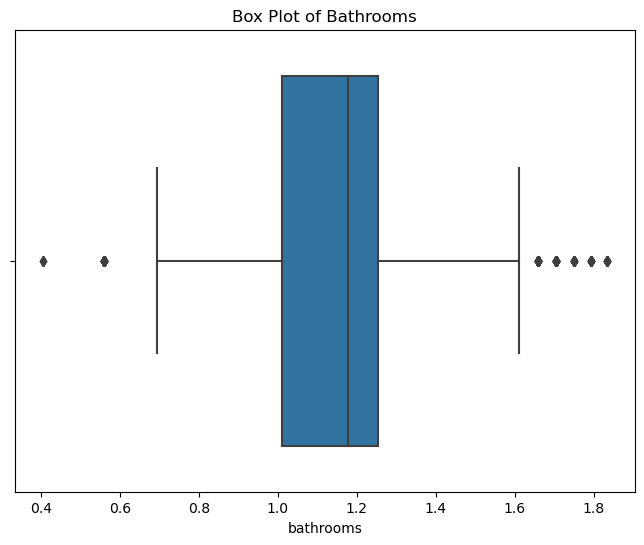

In [51]:
# Assuming df is your DataFrame with cleaned data

min_values, max_values = df.bathrooms.quantile([0.010, 0.95])
min_values, max_values
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['bathrooms'])
plt.title('Box Plot of Bathrooms')
plt.show()

In [52]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_living15,sqft_lot15,total_space
count,2.156700e+04,21567,21567.000000,21567.000000,21567.000000,21567.000000,2.156700e+04,21567.000000,21567.000000,21567.000000,21567.000000,21567.000000,2.156700e+04
mean,4.581211e+09,2014-10-29 05:25:21.825010432,13.046013,3.370334,1.104462,7.549483,1.498887e+04,1.493509,7.394098,290.242686,7.539289,12684.161543,1.706196e+04
min,1.000102e+06,2014-05-02 00:00:00,11.264477,1.000000,0.405465,5.916202,5.200000e+02,1.000000,5.916202,0.000000,5.991465,651.000000,1.423000e+03
25%,2.123049e+09,2014-07-22 00:00:00,12.680756,3.000000,1.011601,7.259116,5.040000e+03,1.000000,7.082549,0.000000,7.307202,5100.000000,7.030000e+03
50%,3.904940e+09,2014-10-16 00:00:00,13.017005,3.000000,1.178655,7.555382,7.610000e+03,1.500000,7.353082,0.000000,7.518064,7620.000000,9.565000e+03
75%,7.309100e+09,2015-02-17 00:00:00,13.373902,4.000000,1.252763,7.844241,1.065100e+04,2.000000,7.701200,540.000000,7.766841,10079.000000,1.295350e+04
max,9.900000e+09,2015-05-27 00:00:00,15.769956,33.000000,1.832581,9.214432,1.651359e+06,3.500000,8.972210,3500.000000,8.734077,871200.000000,1.652659e+06
std,2.876631e+09,NaN,0.522916,0.922609,0.249003,0.421315,4.085524e+04,0.539611,0.424580,433.244158,0.326595,26581.051836,4.101085e+04


In [53]:
#convert categoricals to numericals by creating dummies in relevant columns
# 'waterfront',
#'view', 
#'condition', 
#'grade',
dummies_view = pd.get_dummies(df['view'], prefix='view')
dummies_condition = pd.get_dummies(df['condition'], prefix='condition')
dummies_grade = pd.get_dummies(df['grade'], prefix='grade')
dummies_waterfront = pd.get_dummies(df['waterfront'], prefix='waterfront')

In [54]:
df = pd.concat([df, dummies_view, dummies_condition, dummies_grade, dummies_waterfront], axis=1)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,waterfront_NO,waterfront_YES
0,7129300520,2014-10-13,12.309987,3,0.693147,7.074117,5650,1.0,NO,NONE,...,False,False,False,False,False,True,False,False,True,False
1,6414100192,2014-12-09,13.195616,3,1.178655,7.852050,7242,2.0,NO,NONE,...,False,False,False,False,False,True,False,False,True,False
2,5631500400,2015-02-25,12.100718,2,0.693147,6.647688,10000,1.0,NO,NONE,...,False,False,False,False,True,False,False,False,True,False
3,2487200875,2014-12-09,13.311331,4,1.386294,7.581210,5000,1.0,NO,NONE,...,False,False,False,False,False,True,False,False,True,False
4,1954400510,2015-02-18,13.142168,3,1.098612,7.427144,8080,1.0,NO,NONE,...,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,12.793862,3,1.252763,7.333676,1131,3.0,NO,NONE,...,False,False,False,False,False,False,True,False,True,False
21593,6600060120,2015-02-23,12.899222,4,1.252763,7.745436,5813,2.0,NO,NONE,...,False,False,False,False,False,False,True,False,True,False
21594,1523300141,2014-06-23,12.904461,2,0.559616,6.928538,1350,2.0,NO,NONE,...,False,False,False,False,False,True,False,False,True,False
21595,291310100,2015-01-16,12.899222,3,1.252763,7.378384,2388,2.0,NO,NONE,...,False,False,False,False,False,False,True,False,True,False


In [55]:
df.corr()

ValueError: could not convert string to float: 'NO'

### Analysing and Combined Modelling

In [ ]:
#The following columns show strong correlations with price in the order of sqft_living, sqft_living15, sqft_above, and bathrooms.
X="sqft_living"
y="price"
#plot a scatter plot to show sqft_living vs price
df.plot(x="sqft_living", y="price", kind="scatter");

In [ ]:
#fit the model since the scatter shows correlation
X=df["sqft_living"]
y=df["price"]
model = sm.OLS(endog=y, exog=sm.add_constant(X))  
model

In [ ]:
results = model.fit()
results

In [ ]:
#Show the model
fig, ax = plt.subplots()   
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)    
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax)  
ax.legend();


In [ ]:
sm.graphics.plot_fit(results, "sqft_living")
plt.show()

In [ ]:
sns.regplot(x="sqft_living", y="price", data=df);

In [ ]:
#Evaluate the model
results.summary()

# Interpretation
Overall the model and coefficients are statistically significant, with all p-values well below a standard alpha of 0.05.

The R-squared value is about 0.493 i.e. 50% of the variance in the target variable can be explained by sqft_living.

The intercept is about -4.399e+04, meaning that a decrease in sqft_living, we should expect the price to decrease of 43990k (the units of prices are in thousands of dollars).

The sqft_living coefficient is about 280.8630, meaning that for each additional $1k spent on sqft_living, we would expect to get an additional 280.8673 Square footage of living space in the home

Note that all of these coefficients represent associations rather than causation. 

In [ ]:
#Calculate residues
results.resid

In [ ]:
#Visualize residues
fig, ax = plt.subplots()  

ax.scatter(df["sqft_living"], results.resid)   
ax.axhline(y=0, color="black")   
ax.set_xlabel("sqft_living")   
ax.set_ylabel("residuals");



In [ ]:
#show residue using histogram
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(results.resid)
ax.set_title("Distribution of Residuals (sqft_living)");

In [ ]:
#Residue plot using qq-plot
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals (sqft_living)")
plt.show()


In [ ]:
#plot a scatter plot to show sqft_living15 vs price
X="sqft_living15"
y="price"
df.plot(x="sqft_living15", y="price", kind="scatter");

In [ ]:
#fit the model since the scatter shows correlation
X=df["sqft_living15"]
y=df["price"]
model = sm.OLS(endog=y, exog=sm.add_constant(X))  
model

In [ ]:
results = model.fit()
results

In [ ]:
#Show the model
fig, ax = plt.subplots()   
df.plot.scatter(x="sqft_living15", y="price", label="Data points", ax=ax)    
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax)  
ax.legend();

In [ ]:
#Evaluate the model
results.summary()

# Interpretation

In [ ]:
#Calculate residues
results.resid

In [ ]:
#Visualize residues
fig, ax = plt.subplots()  

ax.scatter(df["sqft_living15"], results.resid)   
ax.axhline(y=0, color="black")   
ax.set_xlabel("sqft_living15")   
ax.set_ylabel("residuals");

In [ ]:
#show residue using histogram
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(results.resid)
ax.set_title("Distribution of Residuals (sqft_living15)");

In [ ]:
#Residue plot using qq-plot
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals (sqft_living15)")
plt.show()


In [ ]:
#plot a scatter plot to show sqft_above vs price
X="sqft_above"
y="price"

df.plot(x="sqft_above", y="price", kind="scatter");

In [ ]:
#fit the model since the scatter shows correlation
X=df["sqft_above"]
y=df["price"]
model = sm.OLS(endog=y, exog=sm.add_constant(X))  
model

In [ ]:
results = model.fit()
results

In [ ]:
#Show the model
fig, ax = plt.subplots()   
df.plot.scatter(x="sqft_above", y="price", label="Data points", ax=ax)    
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax)  
ax.legend();

In [ ]:
#Evaluate the model
results.summary()

# int....

In [ ]:
#Calculate residues
results.resid

NameError: name 'results' is not defined

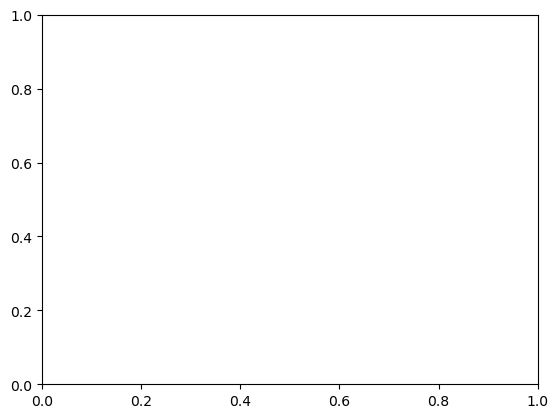

In [56]:
#Visualize residues
fig, ax = plt.subplots()  

ax.scatter(df["sqft_above"], results.resid)   
ax.axhline(y=0, color="black")   
ax.set_xlabel("sqft_above")   
ax.set_ylabel("residuals");

NameError: name 'results' is not defined

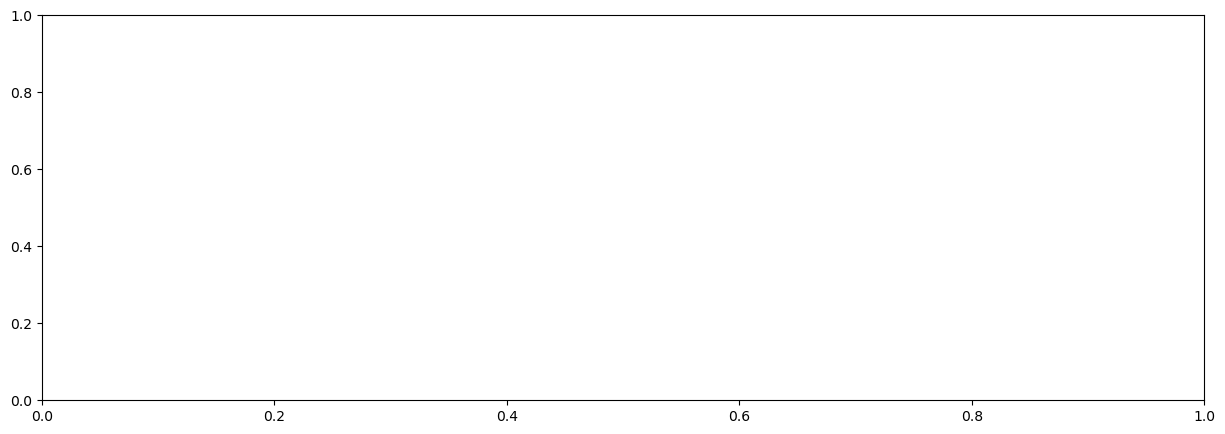

In [57]:
#show residue using histogram
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(results.resid)
ax.set_title("Distribution of Residuals (sqft_above)");

NameError: name 'results' is not defined

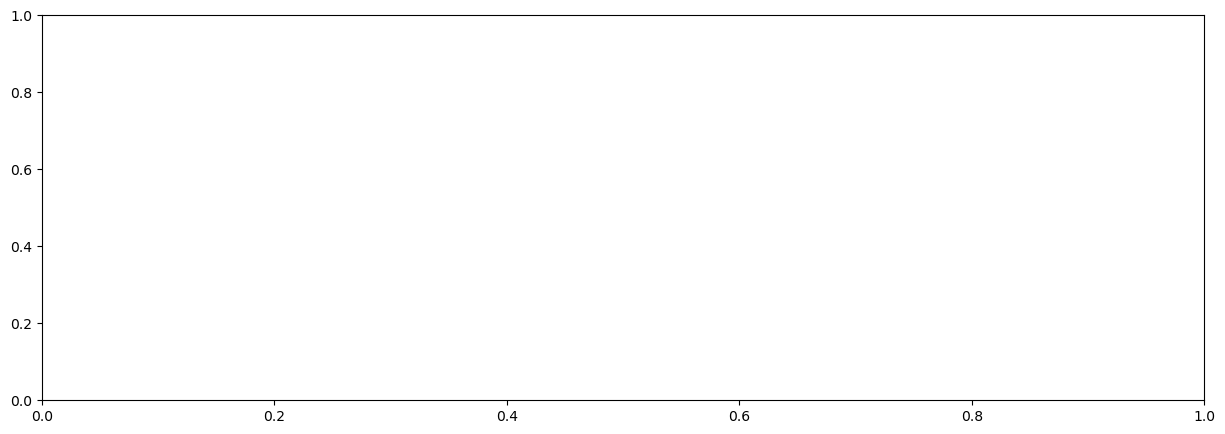

In [58]:
#Residue plot using qq-plot
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals (sqft_above)")
plt.show()


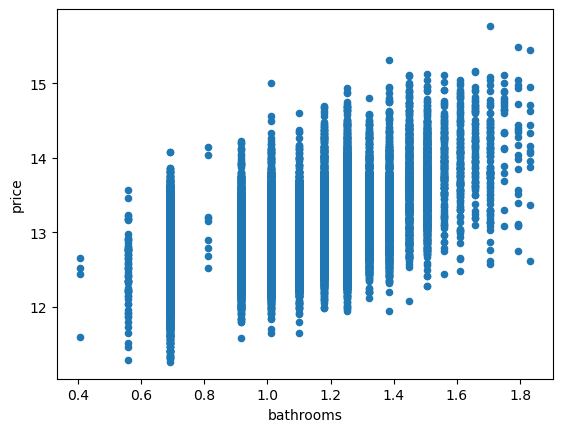

In [59]:
#plot a scatter plot to show bathrooms vs price
X="bathrooms"
y="price"

df.plot(x="bathrooms", y="price", kind="scatter");

In [60]:
#fit the model since the scatter shows correlation
X=df["bathrooms"]
y=df["price"]
model = sm.OLS(endog=y, exog=sm.add_constant(X))  
model

In [61]:
results = model.fit()
results

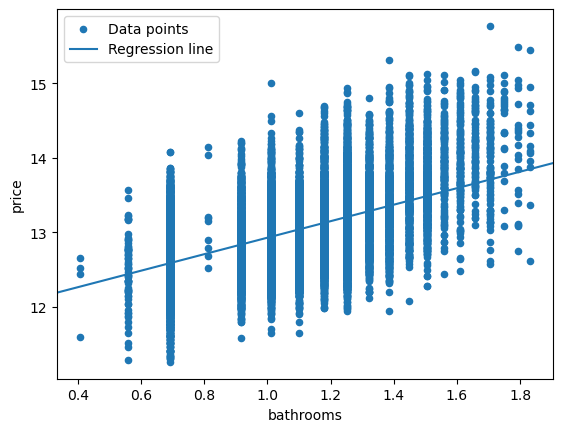

In [62]:
#Show the model
fig, ax = plt.subplots()   
df.plot.scatter(x="bathrooms", y="price", label="Data points", ax=ax)    
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax)  
ax.legend();

In [63]:
#Evaluate the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     8287.
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:10:01   Log-Likelihood:                -13113.
No. Observations:               21567   AIC:                         2.623e+04
Df Residuals:                   21565   BIC:                         2.625e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8240      0.014    859.223      0.000      11.797      11.851
bathrooms      1.1065      0.012     91.032      0.000       1.083       1.130
==============================================================================
Omnibus:                      262.706   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              272.105
Skew:                           0.274   Prob(JB):                     8.19e-60
Kurtosis:                       3.054   Cond. No.                         9.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Int....

In [64]:
#Calculate residues
results.resid

0       -0.280922
1        0.067511
2       -0.490191
3       -0.046519
4        0.102627
           ...   
21592   -0.416241
21593   -0.310881
21594    0.461300
21595   -0.310881
21596    0.248423
Length: 21567, dtype: float64

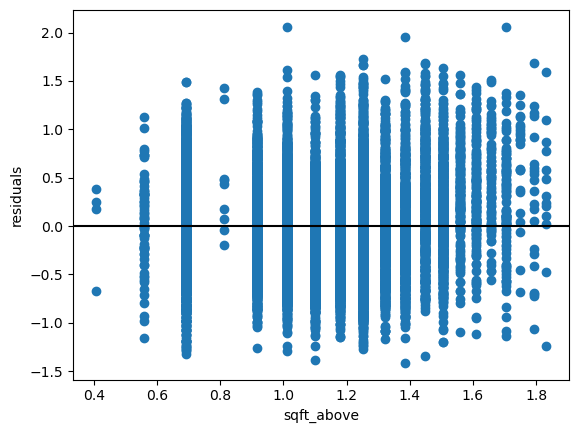

In [65]:
#Visualize residues
fig, ax = plt.subplots()  

ax.scatter(df["bathrooms"], results.resid)   
ax.axhline(y=0, color="black")   
ax.set_xlabel("sqft_above")   
ax.set_ylabel("residuals");

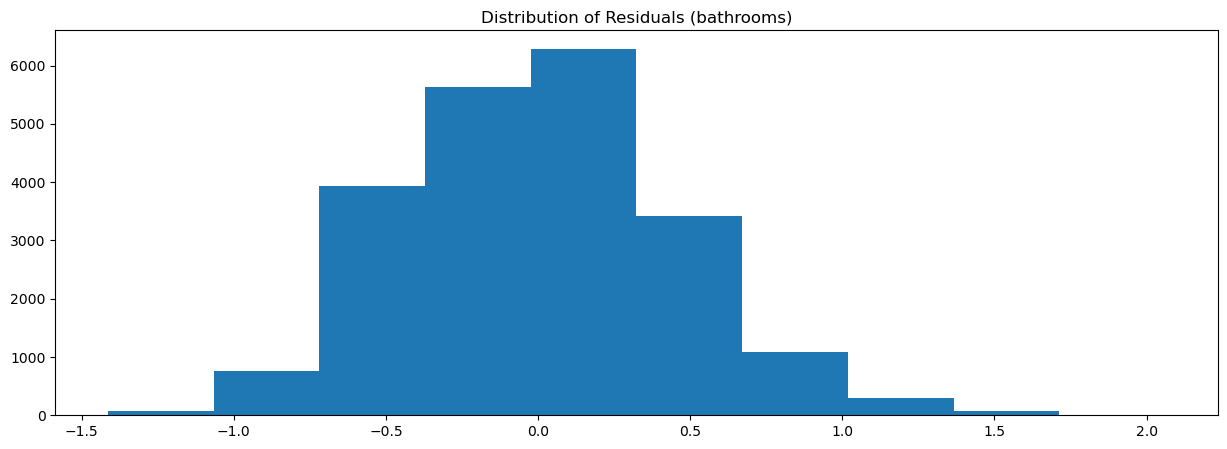

In [66]:
#show residue using histogram
fig, ax = plt.subplots(figsize=(15,5))
ax.hist(results.resid)
ax.set_title("Distribution of Residuals (bathrooms)");

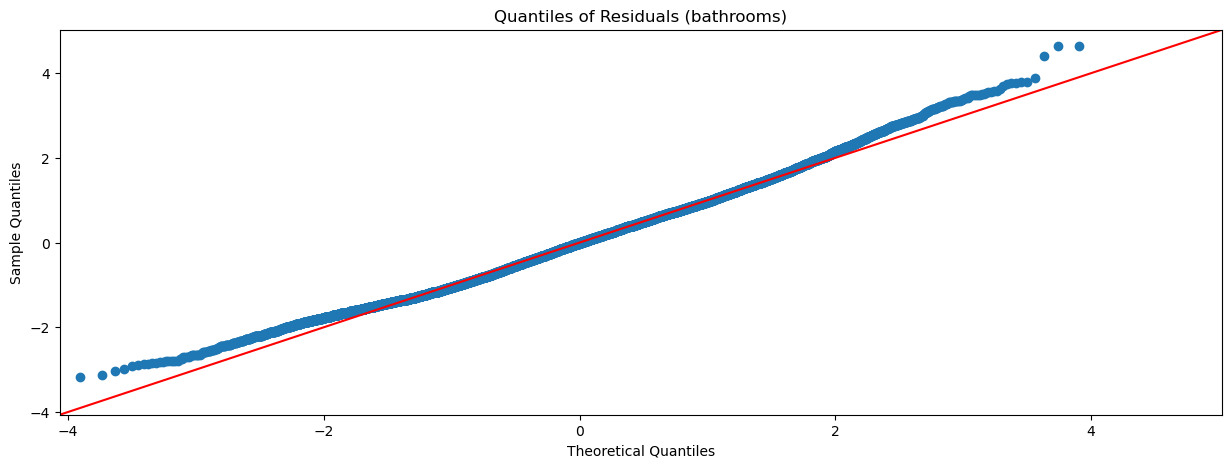

In [67]:
#Residue plot using qq-plot
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals (bathrooms)")
plt.show()
